In [10]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Functions for splitting data and cross-validation
from sklearn.linear_model import LogisticRegression  # Logistic Regression algorithm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Functions to measure model performance
from sklearn.preprocessing import StandardScaler  # Function for scaling features

# Loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

# Data Preprocessing
scaler = StandardScaler()  # Initializing a scaler to normalize data
credit_card_data['Normalized_Amount'] = scaler.fit_transform(credit_card_data['Amount'].values.reshape(-1, 1))  # Normalizing 'Amount' column
credit_card_data.drop(['Time', 'Amount'], axis=1, inplace=True)  # Dropping 'Time' and original 'Amount' columns

# Handling Imbalanced Data
fraud = credit_card_data[credit_card_data['Class'] == 1]  # Extracting rows where 'Class' is fraud (1)
legit = credit_card_data[credit_card_data['Class'] == 0].sample(n=len(fraud))  # Extracting random legit samples matching fraud count
balanced_data = pd.concat([fraud, legit])  # Creating a balanced dataset by combining fraud and legit samples

X = balanced_data.drop('Class', axis=1)
y = balanced_data['Class']

# Splitting the data into features and targets for training and testing
# 'test_size=0.2' splits 20% of the data for testing, 'random_state=42' ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Building and Training
model = LogisticRegression(max_iter=1000)

# Hyperparameter Tuning using GridSearchCV
# Define hyperparameters for tuning (regularization parameter)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Grid search with 5-fold cross-validation using F1 score
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

# Training the model
grid_search.fit(X_train, y_train)

# Selecting the best model based on cross-validation results
best_model = grid_search.best_estimator_

# Evaluating the Model on Test Data
# Training the best model on the entire training set
best_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_model.predict(X_test)

# Calculating Evaluation Metrics
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculating precision (true positives / predicted positives)
precision = precision_score(y_test, y_pred)

# Calculating recall (true positives / actual positives)
recall = recall_score(y_test, y_pred)

# Calculating F1 score (harmonic mean of precision and recall)
# A higher F1 score implies a good balance between identifying actual fraudulent transactions (recall) while minimizing false positives (precision).
f1 = f1_score(y_test, y_pred)

# Generating a confusion matrix for performance visualization
# Structure of Confusion matrix:
'''
Actual/Predicted     Positive Class (1)    Negative Class (0)
Positive Class (1)        TP                    FN
Negative Class (0)        FP                    TN
'''
# Our result shows that False positives and False negatives are very low => Model is good! (More accurate)
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying Evaluation Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Cross-Validation to Assess Model Performance

# Performing 5-fold cross-validation using F1 score
# Meaning: dataset is divided into 5 equal parts, 4 for training and 1 for testing
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')

print("Cross-Validation Scores:", cv_scores)

# Calculating and displaying the mean cross-validation score
print("Mean CV Score:", np.mean(cv_scores))


Accuracy: 0.9122807017543859
Precision: 0.9259259259259259
Recall: 0.8928571428571429
F1 Score: 0.9090909090909091
Confusion Matrix:
[[27  2]
 [ 3 25]]
Cross-Validation Scores: [0.98245614 0.92592593 0.94545455 0.92307692 0.98245614]
Mean CV Score: 0.9518739350318297


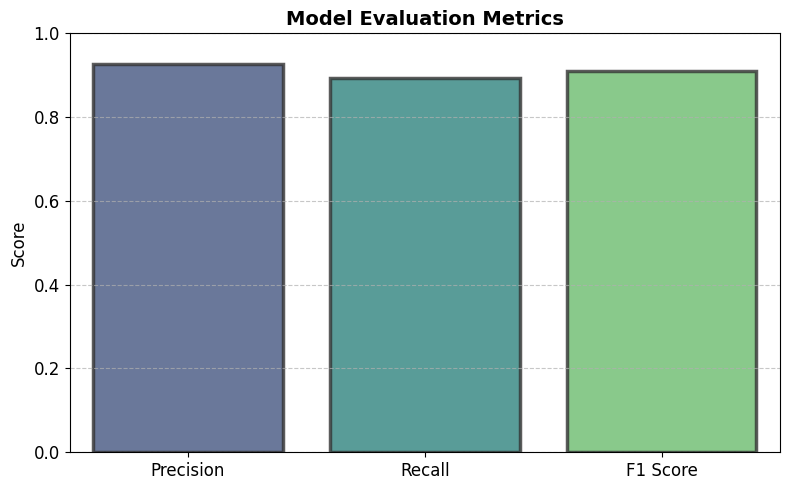

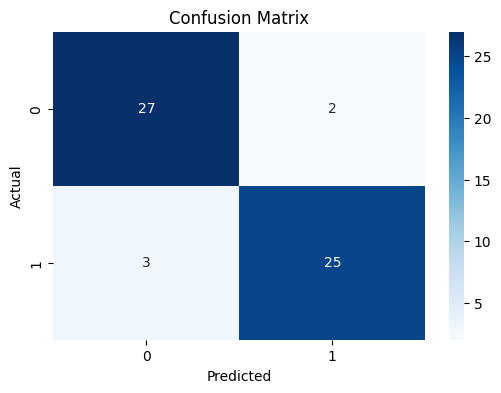

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Metrics and Scores
metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]

# Creating a Stylish Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=scores, palette='viridis', alpha=0.8, linewidth=2.5, edgecolor=".2")
plt.title('Model Evaluation Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
